In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r"train Predict the Batch Performance 17 Dec 2020.csv")
df_test=pd.read_csv(r'test Predict the Batch Performance 17 Dec 2020.csv')

# New Section

In [3]:
df.head()

,Id,x0_t0,x0_t1,x0_t2,x0_t3,x0_t4,x0_t5,x0_t6,x1_t0,x1_t1,...,x53_t5,x53_t6,x54_t0,x54_t1,x54_t2,x54_t3,x54_t4,x54_t5,x54_t6,y2
0,706,762.212216,753.162754,754.610620,762.787135,768.170347,769.815486,750.950000,0.902534,0.873314,...,87.200000,87.2,1.788239,1.883677,1.894829,1.865024,1.755078,2.03000,2.03,0.72
1,239,762.671780,746.631882,745.807832,755.992886,761.814347,766.110745,762.535189,1.366119,1.358298,...,72.613391,87.2,1.920067,1.820872,1.863998,1.827162,1.964556,1.96579,2.03,0.62
2,613,766.867777,756.642963,750.059697,756.377980,760.087594,758.380275,750.950000,0.821431,0.825063,...,87.200000,87.2,2.084817,2.019537,2.197232,2.032493,1.976534,2.03000,2.03,0.57
3,588,751.077287,758.230866,761.391167,763.190054,768.715192,770.447814,750.950000,0.712874,0.744777,...,87.200000,87.2,1.853655,1.848088,1.880007,2.068814,1.871028,2.03000,2.03,1.01
4,780,772.430815,772.254344,772.322597,771.926261,768.820073,772.908223,750.950000,0.742664,0.676266,...,87.200000,87.2,2.211915,2.387687,2.368041,2.360032,2.352961,2.03000,2.03,-0.42


In [4]:
df.describe()

,Id,x0_t0,x0_t1,x0_t2,x0_t3,x0_t4,x0_t5,x0_t6,x1_t0,x1_t1,...,x53_t5,x53_t6,x54_t0,x54_t1,x54_t2,x54_t3,x54_t4,x54_t5,x54_t6,y2
count,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,7.940000e+02,7.940000e+02,...,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000
mean,438.658690,754.919194,754.729879,754.646425,754.540917,754.424182,754.535914,752.154530,8.751822e-01,8.713170e-01,...,86.782481,87.233572,1.931834,1.929294,1.929327,1.930606,1.918361,2.004459,2.028760,0.528841
std,254.610219,13.126818,17.596497,13.928037,13.114229,13.238951,13.424742,7.333076,3.501364e-01,3.526789e-01,...,8.688329,1.375731,0.370322,0.416583,0.375554,0.364132,0.373211,0.184948,0.029712,0.184369
min,0.000000,694.863409,436.366425,648.518443,689.144977,682.132476,680.739213,704.677729,-1.164153e-11,-1.164153e-11,...,25.000000,75.965148,0.135551,0.141006,0.123514,0.086733,0.032860,0.079038,1.273031,-1.660000
25%,217.250000,746.507394,746.225540,746.135900,746.381193,746.140993,746.019990,750.950000,6.932981e-01,6.882317e-01,...,87.200000,87.200000,1.804678,1.780031,1.783420,1.802233,1.779655,2.030000,2.030000,0.450000
50%,438.500000,756.095127,756.750034,755.696801,755.539600,756.077535,755.891258,750.950000,7.969188e-01,7.985343e-01,...,87.200000,87.200000,1.964852,1.951801,1.977931,1.974037,1.944210,2.030000,2.030000,0.580000
75%,658.750000,764.434651,764.838969,764.572070,764.113391,764.013162,764.111608,750.950000,1.228083e+00,1.230598e+00,...,87.200000,87.200000,2.136718,2.145547,2.136183,2.135681,2.121476,2.030000,2.030000,0.600000
max,881.000000,790.272046,791.044214,790.588038,789.457827,786.099166,788.762156,785.730598,1.568039e+00,1.596464e+00,...,125.000000,123.653108,3.026312,6.884922,2.994906,2.932883,2.807641,2.729407,2.083415,1.600000


In [5]:
df.isnull().sum()

Id        0
x0_t0     0
x0_t1     0
x0_t2     0
x0_t3     0
         ..
x54_t3    0
x54_t4    0
x54_t5    0
x54_t6    0
y2        0
Length: 387, dtype: int64

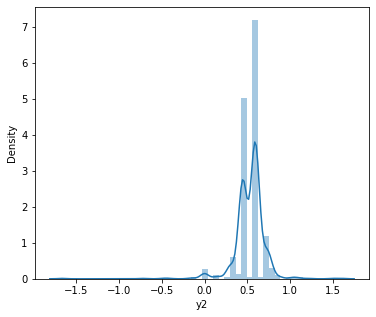

In [6]:
plt.figure(figsize=(6, 5))
p = sns.distplot(
    df['y2']
)


In [7]:
#Standardization of data

mod_df = df[(df.y2<=1) &  (df.y2>=0)]
mod_df.shape
y=mod_df["y2"]






In [8]:
# check mulitcollinearity using VIF: Variance inflation factor
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_scaled = scaler.fit_transform(mod_df)
from statsmodels.stats.outliers_influence import variance_inflation_factor



In [9]:
variables = X_scaled
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif["Features"] = mod_df.columns

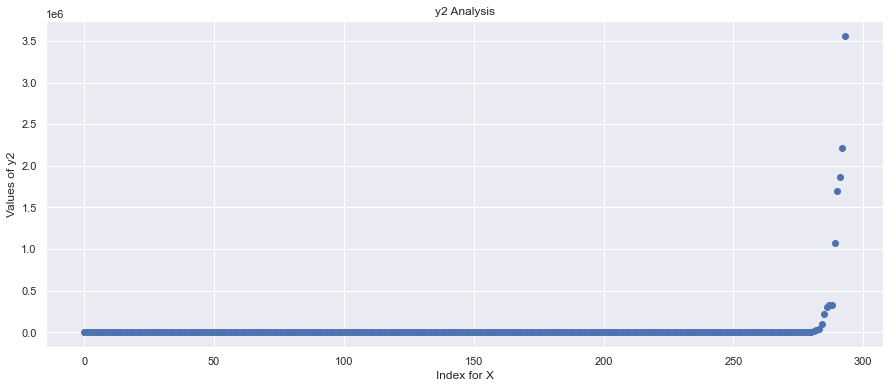

In [12]:
#ploting by removing the outliers
sns.set(rc={'figure.figsize':(15,6)})
plt.title("y2 Analysis")
plt.xlabel("Index for X" )
plt.ylabel("Values of y2")
plt.scatter(range(vif.shape[0]),np.sort(vif.VIF.values))

In [10]:
sorted(vif.VIF)

[2.7242753922060183,
 3.8836536046549597,
 4.057137539432519,
 4.932162807667216,
 5.093868100256227,
 6.040692147769283,
 6.69881462027048,
 7.370557321748992,
 7.692565148613474,
 8.037311156714276,
 8.080687817829427,
 8.16376088304482,
 10.298089786737783,
 13.48469141069343,
 14.075618501450684,
 14.43994487783109,
 14.670274514055352,
 18.240267100964637,
 19.22289531103819,
 24.251043981262544,
 24.864353666003648,
 34.312016981617475,
 39.50745803173465,
 50.79735950118002,
 55.04018398797386,
 55.7283617000448,
 nan,
 nan,
 2.3597457770789934,
 2.6292989524964643,
 3.5722160887259116,
 6.1381389494882095,
 7.524572766006022,
 7.926290095271977,
 7.935567195692674,
 8.391707063142226,
 10.081929892461934,
 10.938450186596912,
 14.044166234664184,
 46.66566503218321,
 167.04858565886826,
 180.58075173949436,
 185.3041633360544,
 242.20768021256416,
 261.4510501232511,
 478.42981856618036,
 747.4466675748754,
 762.3718300129658,
 1154.6800314795576,
 2206.1004381669545,
 4675.248

In [11]:
#no of columns greater than VIF 10
tmp = sorted(vif[(vif["VIF"]<=8.0) & (vif["VIF"]>=4)] ["Features"])
tmp


['x0_t0',
 'x0_t1',
 'x0_t4',
 'x0_t5',
 'x11_t6',
 'x13_t6',
 'x14_t0',
 'x14_t1',
 'x19_t0',
 'x21_t6',
 'x23_t0',
 'x27_t0',
 'x27_t1',
 'x27_t2',
 'x27_t4',
 'x27_t5',
 'x29_t0',
 'x29_t1',
 'x29_t3',
 'x29_t4',
 'x29_t5',
 'x35_t5',
 'x3_t5',
 'x3_t6',
 'x41_t5',
 'x45_t1',
 'x47_t0',
 'x47_t1',
 'x47_t2',
 'x47_t3',
 'x47_t4',
 'x48_t0',
 'x48_t1',
 'x48_t2',
 'x48_t3',
 'x48_t4',
 'x50_t1',
 'x50_t2',
 'x50_t3',
 'x53_t5',
 'x54_t1',
 'x54_t4',
 'x54_t5',
 'x5_t0',
 'x9_t1',
 'x9_t2',
 'x9_t3',
 'x9_t4',
 'x9_t5',
 'x9_t6']

In [13]:
len(tmp)

50

In [14]:
#Removing VIF > 10 
drop_array=tmp
X=mod_df[tmp]


In [15]:
X.shape

(780, 50)

In [16]:
#X.drop('y2',axis=1,inplace=True)

In [17]:
X.head()

,x0_t0,x0_t1,x0_t4,x0_t5,x11_t6,x13_t6,x14_t0,x14_t1,x19_t0,x21_t6,...,x54_t1,x54_t4,x54_t5,x5_t0,x9_t1,x9_t2,x9_t3,x9_t4,x9_t5,x9_t6
0,762.212216,753.162754,768.170347,769.815486,9.400000,495.530000,0.897013,0.897303,80.0,27.0,...,1.883677,1.755078,2.030000,748.773616,0.244055,0.245363,0.248112,0.335132,0.257364,0.310000
1,762.671780,746.631882,761.814347,766.110745,52.836098,427.375337,0.900293,0.900314,80.0,29.0,...,1.820872,1.964556,1.965790,720.968536,0.357220,0.303688,0.256193,0.223815,0.360538,0.240273
2,766.867777,756.642963,760.087594,758.380275,9.400000,495.530000,0.901689,0.901869,80.0,27.0,...,2.019537,1.976534,2.030000,762.066151,0.128335,0.157638,0.295245,0.297705,0.216435,0.310000
5,759.214578,753.733085,755.826560,755.238797,9.400000,495.530000,0.901871,0.901957,80.0,27.0,...,2.196053,2.272081,2.030000,747.682834,0.235546,0.346985,0.262499,0.353931,0.360703,0.310000
6,760.229220,763.722385,760.680692,764.814620,7.266019,477.257824,0.848419,0.848383,80.0,27.0,...,2.094220,2.124493,1.851155,750.388363,0.050311,0.052748,0.046689,0.047468,0.046164,0.047938


In [18]:
print(len(drop_array))

50


In [19]:
var = tmp[:len(tmp)-1]

In [20]:
var

['x0_t0',
 'x0_t1',
 'x0_t4',
 'x0_t5',
 'x11_t6',
 'x13_t6',
 'x14_t0',
 'x14_t1',
 'x19_t0',
 'x21_t6',
 'x23_t0',
 'x27_t0',
 'x27_t1',
 'x27_t2',
 'x27_t4',
 'x27_t5',
 'x29_t0',
 'x29_t1',
 'x29_t3',
 'x29_t4',
 'x29_t5',
 'x35_t5',
 'x3_t5',
 'x3_t6',
 'x41_t5',
 'x45_t1',
 'x47_t0',
 'x47_t1',
 'x47_t2',
 'x47_t3',
 'x47_t4',
 'x48_t0',
 'x48_t1',
 'x48_t2',
 'x48_t3',
 'x48_t4',
 'x50_t1',
 'x50_t2',
 'x50_t3',
 'x53_t5',
 'x54_t1',
 'x54_t4',
 'x54_t5',
 'x5_t0',
 'x9_t1',
 'x9_t2',
 'x9_t3',
 'x9_t4',
 'x9_t5']

In [21]:
#drop_array_test=tmp

X_test_p=df_test[tmp]

In [22]:

# Actual Traing data - (794,387)
print(X.shape)
print(X_test_p.shape)


(780, 50)
(89, 50)


In [23]:
X_test_p.head()

,x0_t0,x0_t1,x0_t4,x0_t5,x11_t6,x13_t6,x14_t0,x14_t1,x19_t0,x21_t6,...,x54_t1,x54_t4,x54_t5,x5_t0,x9_t1,x9_t2,x9_t3,x9_t4,x9_t5,x9_t6
0,738.152456,747.990517,754.378901,746.444051,9.4,495.53,0.901902,0.901779,80.0,27.0,...,1.913202,1.480912,2.03,750.314288,0.190441,0.204893,0.253198,0.322366,0.322622,0.31
1,750.304526,751.440356,749.642800,751.071232,9.4,495.53,0.879294,0.879239,80.0,27.0,...,1.660712,2.044686,2.03,732.939902,0.289637,0.299346,0.266894,0.261006,0.318241,0.31
2,778.247612,766.210592,776.258670,766.606237,9.4,495.53,0.897258,0.897336,80.0,27.0,...,1.778088,2.193177,2.03,758.659606,0.242567,0.242238,0.208215,0.254057,0.249183,0.31
3,759.227472,758.535754,754.005989,757.404229,9.4,495.53,0.896703,0.896760,80.0,27.0,...,2.091196,1.741741,2.03,747.475924,0.132240,0.132727,0.139152,0.138675,0.137362,0.31
4,770.473802,768.971055,768.813193,760.116829,9.4,495.53,0.847800,0.847813,80.0,27.0,...,2.407545,2.099017,2.03,764.077975,0.122124,0.122047,0.116937,0.118519,0.119184,0.31


In [24]:
X.head()

,x0_t0,x0_t1,x0_t4,x0_t5,x11_t6,x13_t6,x14_t0,x14_t1,x19_t0,x21_t6,...,x54_t1,x54_t4,x54_t5,x5_t0,x9_t1,x9_t2,x9_t3,x9_t4,x9_t5,x9_t6
0,762.212216,753.162754,768.170347,769.815486,9.400000,495.530000,0.897013,0.897303,80.0,27.0,...,1.883677,1.755078,2.030000,748.773616,0.244055,0.245363,0.248112,0.335132,0.257364,0.310000
1,762.671780,746.631882,761.814347,766.110745,52.836098,427.375337,0.900293,0.900314,80.0,29.0,...,1.820872,1.964556,1.965790,720.968536,0.357220,0.303688,0.256193,0.223815,0.360538,0.240273
2,766.867777,756.642963,760.087594,758.380275,9.400000,495.530000,0.901689,0.901869,80.0,27.0,...,2.019537,1.976534,2.030000,762.066151,0.128335,0.157638,0.295245,0.297705,0.216435,0.310000
5,759.214578,753.733085,755.826560,755.238797,9.400000,495.530000,0.901871,0.901957,80.0,27.0,...,2.196053,2.272081,2.030000,747.682834,0.235546,0.346985,0.262499,0.353931,0.360703,0.310000
6,760.229220,763.722385,760.680692,764.814620,7.266019,477.257824,0.848419,0.848383,80.0,27.0,...,2.094220,2.124493,1.851155,750.388363,0.050311,0.052748,0.046689,0.047468,0.046164,0.047938


In [25]:
X.shape

(780, 50)

In [26]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
d=scaler.fit_transform(X)
names=X.columns
scaled_df = pd.DataFrame(d, columns=names)

t=scaler.fit_transform(X_test_p)
names=X_test_p.columns
scaled_df_p = pd.DataFrame(t, columns=names)


In [27]:
scaled_df.head()

,x0_t0,x0_t1,x0_t4,x0_t5,x11_t6,x13_t6,x14_t0,x14_t1,x19_t0,x21_t6,...,x54_t1,x54_t4,x54_t5,x5_t0,x9_t1,x9_t2,x9_t3,x9_t4,x9_t5,x9_t6
0,0.341454,-0.192542,0.670644,0.765069,0.000000,0.000000,-0.158093,-0.147592,0.0,0.0,...,-0.197470,-0.556309,0.000000,0.002385,0.146540,0.104183,0.127059,0.839366,0.218387,0.000000
1,0.367209,-0.543077,0.315815,0.561028,43.436098,-68.154663,-0.011889,-0.011033,0.0,2.0,...,-0.366876,0.055503,-0.064210,-1.303557,1.095057,0.575429,0.192906,-0.033049,0.994369,-7.877544
2,0.602365,-0.005747,0.219418,0.135268,0.000000,0.000000,0.050348,0.059533,0.0,0.0,...,0.168994,0.090487,0.000000,0.626706,-0.823395,-0.604609,0.511088,0.546038,-0.089444,0.000000
3,0.173457,-0.161930,-0.018458,-0.037751,0.000000,0.000000,0.058458,0.063516,0.0,0.0,...,0.645119,0.953678,0.000000,-0.048847,0.075218,0.925255,0.244286,0.986695,0.995608,0.000000
4,0.230321,0.374231,0.252528,0.489643,-2.133981,-18.272176,-2.323993,-2.366489,0.0,0.0,...,0.370440,0.522625,-0.178845,0.078226,-1.477371,-1.452094,-1.514059,-1.415123,-1.370064,-29.607050


In [28]:
X = scaled_df

In [29]:
X.shape

(780, 50)

In [30]:
scaled_df_p.head()

,x0_t0,x0_t1,x0_t4,x0_t5,x11_t6,x13_t6,x14_t0,x14_t1,x19_t0,x21_t6,...,x54_t1,x54_t4,x54_t5,x5_t0,x9_t1,x9_t2,x9_t3,x9_t4,x9_t5,x9_t6
0,-1.069274,-0.316786,0.006159,-0.612149,0.0,0.0,0.069571,0.185427,0.0,0.0,...,-0.234146,-1.121932,0.0,0.051654,-0.246359,-0.171192,0.203564,0.665243,0.787070,0.0
1,-0.300773,-0.113628,-0.317021,-0.254524,0.0,0.0,-1.182892,-3.625023,0.0,0.0,...,-0.936274,0.391950,0.0,-0.700137,0.352354,0.432546,0.302901,0.168505,0.750947,0.0
2,1.466356,0.756180,1.499180,0.946143,0.0,0.0,-0.187729,-0.565713,0.0,0.0,...,-0.609871,0.790690,0.0,0.412757,0.068255,0.067512,-0.122690,0.112248,0.181445,0.0
3,0.263517,0.304215,-0.019288,0.234940,0.0,0.0,-0.218451,-0.662971,0.0,0.0,...,0.260822,-0.421536,0.0,-0.071162,-0.597639,-0.632470,-0.623595,-0.821823,-0.740708,0.0
4,0.974738,0.918742,0.991119,0.444591,0.0,0.0,-2.927669,-8.937655,0.0,0.0,...,1.140529,0.537844,0.0,0.647210,-0.658692,-0.700739,-0.784723,-0.984992,-0.890614,0.0


In [31]:
X_test_p = scaled_df_p

## MODEL BUILDING

In [32]:
#Importing required models
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [33]:

#X_trans = StandardScaler().fit_transform(X)
X_trans = X

from sklearn.decomposition import PCA
pca = PCA(n_components=15)
principalComponents = pca.fit_transform(X_trans)
pDf_15 = pd.DataFrame(data = principalComponents
             , columns = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12','pc13','pc14','pc15'])

print(pDf_15.shape)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(pDf_15,y,test_size=0.1, random_state=100)

from sklearn.linear_model import LinearRegression
sklr = LinearRegression()
sklr.fit(X_train,y_train)
sklr.score(X_test,y_test)


(780, 15)


-0.07330338926840274

In [34]:
#Test Data
#X_trans_test_20 = StandardScaler().fit_transform(X_test)
X_trans_test_15 = X_test_p 
pca = PCA(n_components=15)
principalComponents = pca.fit_transform(X_trans_test_15)
pDf_test_20 = pd.DataFrame(data = principalComponents
             , columns = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12','pc13','pc14','pc15'])


In [35]:
sklr.predict(X_test_p)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 15 is different from 50)

In [36]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, random_state=10)

print(X_train.shape)
print(X_test.shape)

(702, 50)
(78, 50)


In [37]:
# Instantiate all the models

lr = LinearRegression()
ls = Lasso()
rd = Ridge()
dr = DecisionTreeRegressor()
rr = RandomForestRegressor()

In [38]:
#Linear Regression
lr.fit(X_train,y_train)

LinearRegression()

In [39]:

y_pred = lr.predict(X_test)

In [40]:
y_pred_p = lr.predict(X_test_p)

In [41]:
print(y_pred_p)

[0.5312536  0.46353647 0.54015258 0.52591566 0.52659635 0.5152589
 0.56494903 0.53102254 0.4989025  0.51488655 0.60904952 0.5431064
 0.52710702 0.47366023 0.5974394  0.58679702 0.40655418 0.54908096
 0.53214985 0.49590912 0.51594421 0.47432418 0.5478035  0.56192544
 0.45951491 0.46731992 0.48645502 0.54642358 0.57994986 0.64711482
 0.53780286 0.60160283 0.5201704  0.55738534 0.56709811 0.58020972
 0.66342264 0.52012784 0.54281169 0.54672341 0.53299572 0.51547143
 0.52025024 0.53869676 0.59336322 0.53095929 0.47572164 0.43157303
 0.5466     0.61049794 0.53156961 0.47891367 0.5650719  0.51796855
 0.49644235 0.70608664 0.54867722 0.62093298 0.50818042 0.53651738
 0.49833517 0.41176749 0.65779811 0.65156811 0.5890559  0.59137523
 0.57455661 0.4782354  0.60741615 0.58734281 0.58123676 0.50668721
 0.55916592 0.46951354 0.55777266 0.59524095 0.59223335 0.48666426
 0.58161677 0.51231856 0.55572912 0.51148359 0.5160555  0.61018298
 0.37300854 0.48144521 0.45674045 0.5072671  0.60462616]


In [44]:
sub_df = pd.read_csv(r"D:\Python\Hackathon- Grey Atom\Hackathon Predict the Batch Performance 17 Dec 2020\sample_submission.csv")
sub_df['y2'] = y_pred_p
sub_df.to_csv(r"D:\Python\Hackathon- Grey Atom\Hackathon Predict the Batch Performance 17 Dec 2020\sample_submission_lr_8.csv",index=False)

In [45]:
y2 = y_pred_p.tolist()
submission = pd.DataFrame(y2)
submission.head()
submission.to_csv('Sample_submission_lr.csv', index=False)

In [46]:
#residuals= y_pred - y_true

In [47]:
#Residual Plot
#plt.hist(X_test['residuals'])
#plt.show()

In [48]:
print("R squared: {}".format(r2_score(y_true=y_test,y_pred=y_pred)))

R squared: 0.04566487045884082


In [49]:
#Lasoo Regression
ls.fit(X_train, y_train)
y_pred_ls = ls.predict(X_test)
print("R squared: {}".format(r2_score(y_true=y_test,y_pred=y_pred_ls)))

R squared: -0.029598987467639892


In [50]:
y_pred_p = ls.predict(X_test_p)

In [51]:
y_pred_p

array([0.52962324, 0.52962324, 0.52962324, 0.52962324, 0.52962324,
       0.52962324, 0.52962324, 0.52962324, 0.52568163, 0.52962324,
       0.52962324, 0.52962324, 0.52962324, 0.52962324, 0.52962324,
       0.52962324, 0.52962324, 0.52962324, 0.52962324, 0.52962324,
       0.52962324, 0.52962324, 0.52962324, 0.52962324, 0.52962324,
       0.52962324, 0.52962324, 0.52962324, 0.52962324, 0.53019604,
       0.52962324, 0.53123617, 0.52962324, 0.52962324, 0.52962324,
       0.5283699 , 0.5313797 , 0.52962324, 0.52962324, 0.52962324,
       0.52962324, 0.52962324, 0.52962324, 0.52962324, 0.52962324,
       0.52962324, 0.52962324, 0.52962324, 0.52962324, 0.52962324,
       0.52962324, 0.52962324, 0.52962324, 0.52962324, 0.52962324,
       0.52815075, 0.52962324, 0.52962324, 0.52962324, 0.52962324,
       0.52962324, 0.52962324, 0.53438288, 0.53060657, 0.52962324,
       0.5154278 , 0.52962324, 0.52962324, 0.52717979, 0.53306269,
       0.52962324, 0.52801393, 0.52962324, 0.51007901, 0.53045

In [52]:
#Ridge
rd.fit(X_train, y_train)
y_pred_rd = rd.predict(X_test)
print("R squared: {}".format(r2_score(y_true=y_test,y_pred=y_pred_rd)))

R squared: 0.030691090255991815


In [53]:
y_pred_p_rd = rd.predict(X_test_p)

In [54]:
y_pred_p

array([0.52962324, 0.52962324, 0.52962324, 0.52962324, 0.52962324,
       0.52962324, 0.52962324, 0.52962324, 0.52568163, 0.52962324,
       0.52962324, 0.52962324, 0.52962324, 0.52962324, 0.52962324,
       0.52962324, 0.52962324, 0.52962324, 0.52962324, 0.52962324,
       0.52962324, 0.52962324, 0.52962324, 0.52962324, 0.52962324,
       0.52962324, 0.52962324, 0.52962324, 0.52962324, 0.53019604,
       0.52962324, 0.53123617, 0.52962324, 0.52962324, 0.52962324,
       0.5283699 , 0.5313797 , 0.52962324, 0.52962324, 0.52962324,
       0.52962324, 0.52962324, 0.52962324, 0.52962324, 0.52962324,
       0.52962324, 0.52962324, 0.52962324, 0.52962324, 0.52962324,
       0.52962324, 0.52962324, 0.52962324, 0.52962324, 0.52962324,
       0.52815075, 0.52962324, 0.52962324, 0.52962324, 0.52962324,
       0.52962324, 0.52962324, 0.53438288, 0.53060657, 0.52962324,
       0.5154278 , 0.52962324, 0.52962324, 0.52717979, 0.53306269,
       0.52962324, 0.52801393, 0.52962324, 0.51007901, 0.53045

In [56]:
sub_df = pd.read_csv(r"D:\Python\Hackathon- Grey Atom\Hackathon Predict the Batch Performance 17 Dec 2020\sample_submission.csv")
sub_df['y2'] = y_pred_p_rd
sub_df.to_csv(r"D:\Python\Hackathon- Grey Atom\Hackathon Predict the Batch Performance 17 Dec 2020\sample_submission_lr_9.csv",index=False)

In [57]:
#Decision Tree Regressor
dr.fit(X_train, y_train)
y_pred_dr = dr.predict(X_test)
print("R squared: {}".format(r2_score(y_true=y_test,y_pred=y_pred_dr)))

R squared: -0.562540579902501


In [58]:
y_pred_p_dr = dr.predict(X_test_p)

In [59]:
y_pred_p_dr

array([0.3 , 0.44, 0.74, 0.6 , 0.44, 0.6 , 0.58, 0.61, 0.45, 0.57, 0.45,
       0.58, 0.61, 0.57, 0.88, 0.45, 0.6 , 0.72, 0.47, 0.44, 0.59, 0.44,
       0.43, 0.58, 0.6 , 0.45, 0.45, 0.44, 0.59, 0.44, 0.43, 0.6 , 0.57,
       0.6 , 0.56, 0.72, 0.71, 0.43, 0.59, 0.45, 0.58, 0.45, 0.43, 0.31,
       0.58, 0.58, 0.44, 0.3 , 0.45, 0.59, 0.14, 0.58, 0.6 , 0.45, 0.45,
       0.71, 0.44, 0.59, 0.44, 0.58, 0.59, 0.44, 0.6 , 0.57, 0.6 , 0.72,
       0.46, 0.6 , 0.44, 0.43, 0.45, 0.45, 0.72, 0.6 , 0.43, 0.72, 0.72,
       0.57, 0.56, 0.44, 0.76, 0.44, 0.72, 0.6 , 0.16, 0.59, 0.46, 0.44,
       0.76])

In [60]:
#Random Forest Regressor
rr.fit(X_train, y_train)
y_pred_rr = rr.predict(X_test)
print("R squared: {}".format(r2_score(y_true=y_test,y_pred=y_pred_rr)))

R squared: 0.03252524383813349


In [61]:
y_pred_p_rr = rr.predict(X_test_p)
y_pred_p_rr

array([0.5481, 0.4818, 0.551 , 0.5882, 0.4496, 0.5288, 0.5726, 0.5991,
       0.4436, 0.5451, 0.4803, 0.5544, 0.5565, 0.5421, 0.5901, 0.5121,
       0.3722, 0.6066, 0.5394, 0.4938, 0.558 , 0.5836, 0.5275, 0.5371,
       0.5235, 0.4015, 0.476 , 0.6048, 0.601 , 0.5948, 0.5282, 0.5919,
       0.5176, 0.5678, 0.57  , 0.6134, 0.6378, 0.4776, 0.6054, 0.535 ,
       0.5575, 0.5656, 0.5263, 0.5144, 0.5455, 0.5207, 0.5578, 0.3931,
       0.4414, 0.5395, 0.4975, 0.5349, 0.5346, 0.5252, 0.4933, 0.6152,
       0.5043, 0.5848, 0.4639, 0.569 , 0.5803, 0.3504, 0.4935, 0.5239,
       0.5189, 0.5853, 0.5439, 0.4738, 0.5253, 0.5773, 0.516 , 0.5198,
       0.5763, 0.5097, 0.4378, 0.5489, 0.6091, 0.5511, 0.5137, 0.56  ,
       0.5695, 0.5226, 0.4736, 0.5113, 0.3453, 0.5445, 0.4624, 0.5516,
       0.6076])

In [62]:
y_pred_p = rr.predict(X_test_p)

In [63]:
print(y_pred_p)

[0.5481 0.4818 0.551  0.5882 0.4496 0.5288 0.5726 0.5991 0.4436 0.5451
 0.4803 0.5544 0.5565 0.5421 0.5901 0.5121 0.3722 0.6066 0.5394 0.4938
 0.558  0.5836 0.5275 0.5371 0.5235 0.4015 0.476  0.6048 0.601  0.5948
 0.5282 0.5919 0.5176 0.5678 0.57   0.6134 0.6378 0.4776 0.6054 0.535
 0.5575 0.5656 0.5263 0.5144 0.5455 0.5207 0.5578 0.3931 0.4414 0.5395
 0.4975 0.5349 0.5346 0.5252 0.4933 0.6152 0.5043 0.5848 0.4639 0.569
 0.5803 0.3504 0.4935 0.5239 0.5189 0.5853 0.5439 0.4738 0.5253 0.5773
 0.516  0.5198 0.5763 0.5097 0.4378 0.5489 0.6091 0.5511 0.5137 0.56
 0.5695 0.5226 0.4736 0.5113 0.3453 0.5445 0.4624 0.5516 0.6076]


In [64]:
sub_df = pd.read_csv(r"D:\Python\Hackathon- Grey Atom\Hackathon Predict the Batch Performance 17 Dec 2020\sample_submission.csv")
sub_df['y2'] = y_pred_p
sub_df.to_csv(r"D:\Python\Hackathon- Grey Atom\Hackathon Predict the Batch Performance 17 Dec 2020\sample_submission_rr_2.csv",index=False)

In [65]:
Id=df_test['Id'].head()

In [66]:
y2 = y_pred_rr.tolist()

In [67]:
submission = pd.DataFrame(Id,y2)

In [68]:

submission = pd.DataFrame(y_pred_rr)
submission.to_csv('Sample_submission.csv', index=False)

In [69]:
#Xgboost Regressor
import xgboost as xgb
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.01,
                max_depth = 5, alpha = 10, n_estimators = 10,base_score=np.mean(y))
xg_reg.fit(X_train,y_train)

y_pred_xg = xg_reg.predict(X_test)
print("R squared: {}".format(r2_score(y_true=y_test,y_pred=y_pred_xg)))

[10:57:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
R squared: -0.02091084116168007


In [70]:
y_pred_p_xg = xg_reg.predict(X_test_p)
y_pred_p_xg

array([0.53067946, 0.53067946, 0.53067946, 0.53067946, 0.53067946,
       0.53067946, 0.53067946, 0.53067946, 0.53067946, 0.53067946,
       0.53067946, 0.53067946, 0.53067946, 0.53067946, 0.53067946,
       0.53067946, 0.53067946, 0.53067946, 0.53067946, 0.53067946,
       0.53067946, 0.53067946, 0.53067946, 0.53067946, 0.53067946,
       0.53067946, 0.53067946, 0.53067946, 0.53067946, 0.53067946,
       0.53067946, 0.53067946, 0.53067946, 0.53067946, 0.53067946,
       0.53067946, 0.53067946, 0.53067946, 0.53067946, 0.53067946,
       0.53067946, 0.53067946, 0.53067946, 0.53067946, 0.53067946,
       0.53067946, 0.53067946, 0.53067946, 0.53067946, 0.53067946,
       0.53067946, 0.53067946, 0.53067946, 0.53067946, 0.53067946,
       0.53067946, 0.53067946, 0.53067946, 0.53067946, 0.53067946,
       0.53067946, 0.53067946, 0.53067946, 0.53067946, 0.53067946,
       0.53067946, 0.53067946, 0.53067946, 0.53067946, 0.53067946,
       0.53067946, 0.53067946, 0.53067946, 0.53067946, 0.53067

In [71]:
from sklearn.svm import SVR
svm = SVR(kernel = 'rbf')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("R squared: {}".format(r2_score(y_true=y_test,y_pred=y_pred_svm)))

R squared: 0.00014424802120993618


In [72]:
y_pred_svm = svm.predict(X_test_p)
y_pred_p_rr

array([0.5481, 0.4818, 0.551 , 0.5882, 0.4496, 0.5288, 0.5726, 0.5991,
       0.4436, 0.5451, 0.4803, 0.5544, 0.5565, 0.5421, 0.5901, 0.5121,
       0.3722, 0.6066, 0.5394, 0.4938, 0.558 , 0.5836, 0.5275, 0.5371,
       0.5235, 0.4015, 0.476 , 0.6048, 0.601 , 0.5948, 0.5282, 0.5919,
       0.5176, 0.5678, 0.57  , 0.6134, 0.6378, 0.4776, 0.6054, 0.535 ,
       0.5575, 0.5656, 0.5263, 0.5144, 0.5455, 0.5207, 0.5578, 0.3931,
       0.4414, 0.5395, 0.4975, 0.5349, 0.5346, 0.5252, 0.4933, 0.6152,
       0.5043, 0.5848, 0.4639, 0.569 , 0.5803, 0.3504, 0.4935, 0.5239,
       0.5189, 0.5853, 0.5439, 0.4738, 0.5253, 0.5773, 0.516 , 0.5198,
       0.5763, 0.5097, 0.4378, 0.5489, 0.6091, 0.5511, 0.5137, 0.56  ,
       0.5695, 0.5226, 0.4736, 0.5113, 0.3453, 0.5445, 0.4624, 0.5516,
       0.6076])

In [73]:
# Create a list of model and name representation for running experiments

model_ls = [(lr, 'Linear Regression'), (ls, 'Lasso'), (rd, 'Ridge'), (dr, 'Decision Tree Reg'), (rr, 'Random Forest Reg'),(xg_reg, 'XGboost'),(svm, "SVR") ]

# Iterate ovwer each model
for item in model_ls:
    model = item[0]
    name = item[1]
    print(f'Running {name}')
    print('')
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict the results
    y_pred = model.predict(X_test) 
    
    # Evaluate and printR2
    print("R squared: {}".format(r2_score(y_true=y_test,y_pred=y_pred)))    
    print('-'*100)
    print('')

Running Linear Regression

R squared: 0.04566487045884082
----------------------------------------------------------------------------------------------------

Running Lasso

R squared: -0.029598987467639892
----------------------------------------------------------------------------------------------------

Running Ridge

R squared: 0.030691090255991815
----------------------------------------------------------------------------------------------------

Running Decision Tree Reg

R squared: -0.5704449171542236
----------------------------------------------------------------------------------------------------

Running Random Forest Reg

R squared: 0.08735902335608836
----------------------------------------------------------------------------------------------------

Running XGboost

[10:57:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
R squared: -0.0209108411616